In [1]:
# combine data into one file
cat */udc*txt > pur_1990_2016.txt

# Copy a header line and then remove all the headers 
grep -v use_no,prodno,chem_code pur_1990_2016.txt
# then put one back in



SyntaxError: invalid syntax (<ipython-input-1-23c24265f36e>, line 2)

In [ ]:
import csv

# Remove extra white space in elements
with open('pur_1990_2016.txt_noheaders') as f:
    reader = csv.reader(f)
    for row in reader:
        row = [r.strip() for r in row]
        print(",".join(row))


# At this point you get errors when trying to input the data as a dataframe.

In [ ]:
# print out odd rows with no chem_code

for line in open("pur_1990_2016.txt_noheaders_nowhitespace"):
    i=line.strip().split(",")
    if i[2] == "":   # position of chem_code
        print line.strip() # > no_chem_code.csv

In [ ]:
D = {}
total = 0
for line in open("no_chem_code.csv"):
    i=line.strip().split(",")
    yr = i[13].split('/')[-1]
    if yr == '':
        continue

    if yr not in D:
        D[yr]=0
    D[yr]+=1
    total += 1
for year in D:
    print year, D[year]

print 'total', total

In [ ]:

D = {}
total = 0
for line in open("pur_1990_2016.txt_noheaders_nowhitespace"):
    i=line.strip().split(",")

    yr = i[13].split('/')[-1]
    if yr == '':
        continue

    if yr not in D:
        #print(yr)
        D[yr]=0
    D[yr]+=1
    total += 1

    
for year in D:
    print(year, D[year])

print('total', total)



In [6]:
import csv
#import pandas as pd

#op = pd.read_csv("OP.pur", engine='python')
#print(op)
with open('OP.pur') as f:
   reader = csv.reader(f)
   for row in reader:
       print(row)

NameError: name 'csv' is not defined

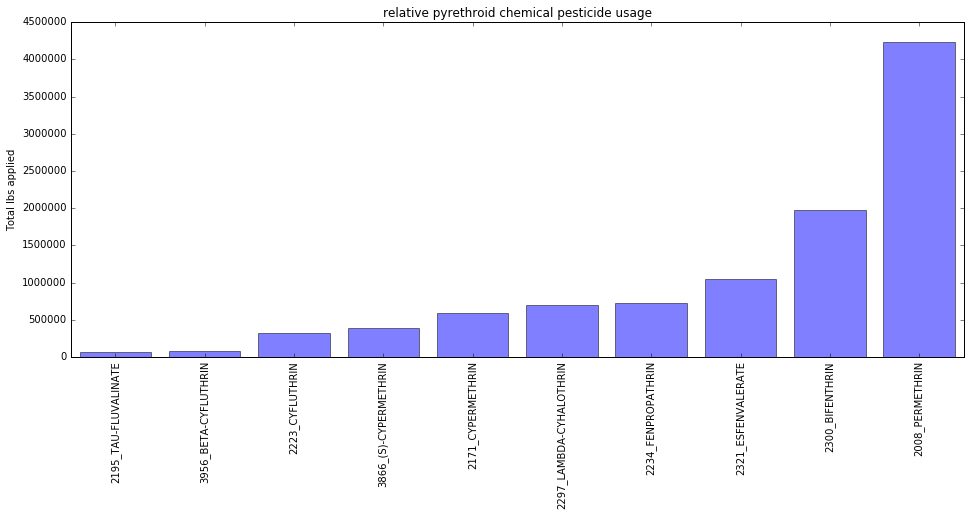

In [19]:
# Pyrethroid lbs.
import math
import matplotlib.pyplot as P
import numpy as np
import sys
%matplotlib inline

P.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')


D={}
for line in open("chem_key2.txt"):
    i=line.strip().split(';')
    if len(i)==2:
        D[i[0]]=i[1]

C = {}
for line in open("pyr_yr_mo.data"):
    i=line.strip().split(";")
    #print i
    yr=int(i[0])
    if yr<1990:
        continue
    chem = i[2]
    if chem not in C:
        C[chem]=0
    total_acres=float(i[6])
    total_lbs=float(i[10])
    C[chem]+=total_lbs


code = [X.strip().split()[0] for X in open("sorted_pyr_lbs.txt")]
#print code

xt =[]
applied = []
for insecticide in code:
    #Set threshold for plot
    if int(C[insecticide])<10000:
        continue
    # convert chem_code to name
    if insecticide in D:
        #print(insecticide,D[insecticide], C[insecticide])
        xt.append("_".join([insecticide,D[insecticide]]))
        applied.append(int(C[insecticide]))
    else:
        #continue
        #print(insecticide,"Not_in_key", C[insecticide])
        xt.append("_".join([insecticide,"Not_in_key"]))
        applied.append(int(C[insecticide]))

y_pos = np.arange(len(xt))

P.bar(y_pos, applied, align='center', alpha=0.5)
P.xticks(y_pos, xt, rotation=90)
P.ylabel('Total lbs applied')
P.title('relative pyrethroid chemical pesticide usage')
 
P.margins(x=.01)


P.show()

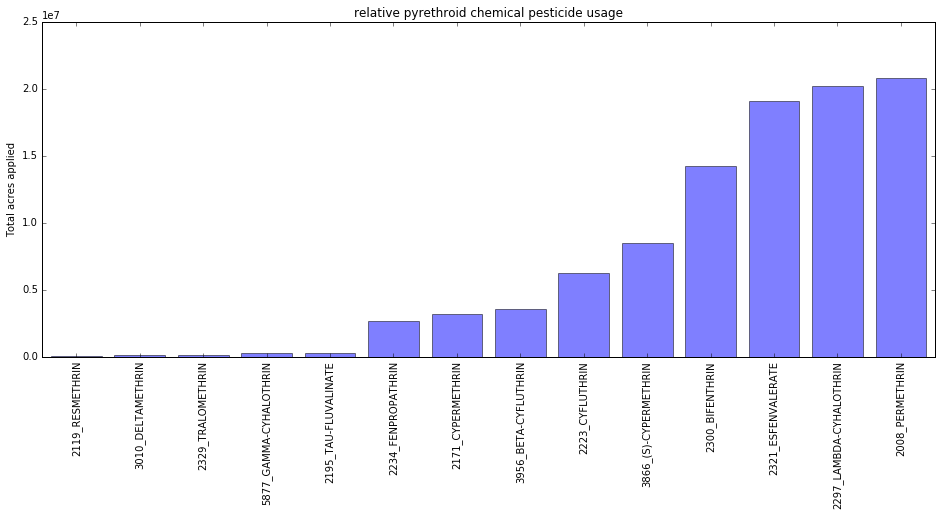

In [20]:
#Pyrethroid ACRES 
import math
import matplotlib.pyplot as P
import numpy as np
import sys
%matplotlib inline

P.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')


D={}
for line in open("chem_key2.txt"):
    i=line.strip().split(';')
    if len(i)==2:
        D[i[0]]=i[1]

C = {}
for line in open("pyr_yr_mo.data"):
    i=line.strip().split(";")
    #print i
    yr=int(i[0])
    if yr<1990:
        continue
    chem = i[2]
    if chem not in C:
        C[chem]=0
    total_acres=float(i[6])
    total_lbs=float(i[10])
    C[chem]+=total_acres


code = [X.strip().split()[0] for X in open("sorted_pyr.txt")]
#print code

xt =[]
applied = []
for insecticide in code:
    #Set threshold for plot
    if int(C[insecticide])<10000:
        continue
    # convert chem_code to name
    #for insecticide in C:
    if insecticide in D:
        #print(insecticide,D[insecticide], C[insecticide])
        xt.append("_".join([insecticide,D[insecticide]]))
        applied.append(int(C[insecticide]))
    else:
        #continue
        #print(insecticide,"Not_in_key", C[insecticide])
        xt.append("_".join([insecticide,"Not_in_key"]))
        applied.append(int(C[insecticide]))

y_pos = np.arange(len(xt))

P.bar(y_pos, applied, align='center', alpha=0.5)
P.xticks(y_pos, xt, rotation=90)
P.ylabel('Total acres applied')
P.title('relative pyrethroid chemical pesticide usage')
 

P.margins(x=.01)

P.show()

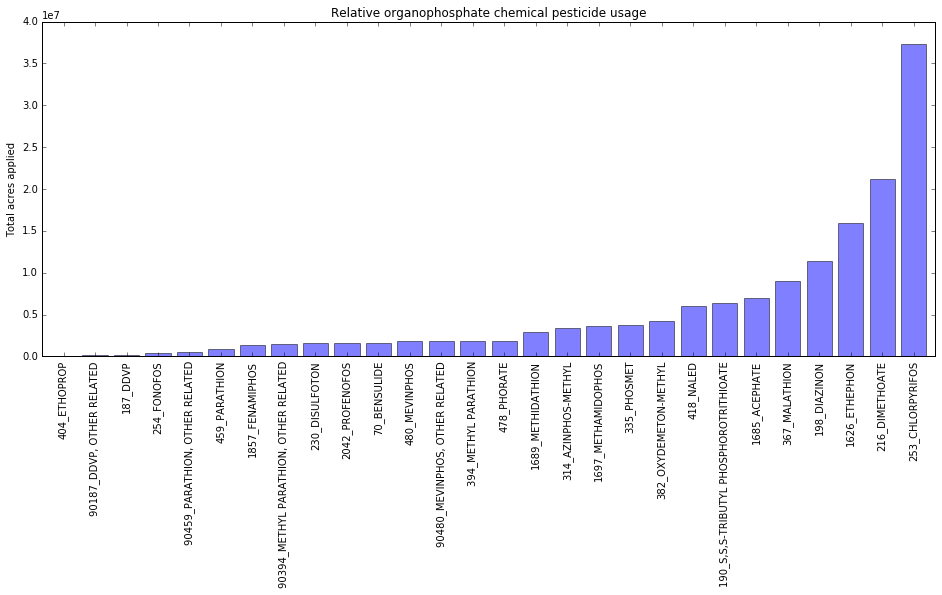

In [22]:
#Organophosphate ACRES 
import math
import matplotlib.pyplot as P
import numpy as np
import sys
%matplotlib inline

P.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')


D={}
for line in open("chem_key2.txt"):
    i=line.strip().split(';')
    if len(i)==2:
        D[i[0]]=i[1]

C = {}
for line in open("OP_yr_mo.data"):
    i=line.strip().split(";")
    #print i
    yr=int(i[0])
    if yr<1990:
        continue
    chem = i[2]
    if chem not in C:
        C[chem]=0
    total_acres=float(i[6])
    total_lbs=float(i[10])
    C[chem]+=total_acres


code = [X.strip().split()[0] for X in open("sorted_op.txt")]
#print code

xt =[]
applied = []
for insecticide in code:
    #Set threshold for plot
    if int(C[insecticide])<50000:
        continue
    # convert chem_code to name
    if insecticide in D:
        #print(insecticide,D[insecticide], C[insecticide])
        xt.append("_".join([insecticide,D[insecticide]]))
        applied.append(int(C[insecticide]))
    else:
        #continue
        #print(insecticide,"Not_in_key", C[insecticide])
        xt.append("_".join([insecticide,"Not_in_key"]))
        applied.append(int(C[insecticide]))

y_pos = np.arange(len(xt))

P.bar(y_pos, applied, align='center', alpha=0.5)
P.xticks(y_pos, xt, rotation=90)
P.ylabel('Total acres applied')
P.title('Relative organophosphate chemical pesticide usage')
 
P.margins(x=.01)


P.show()

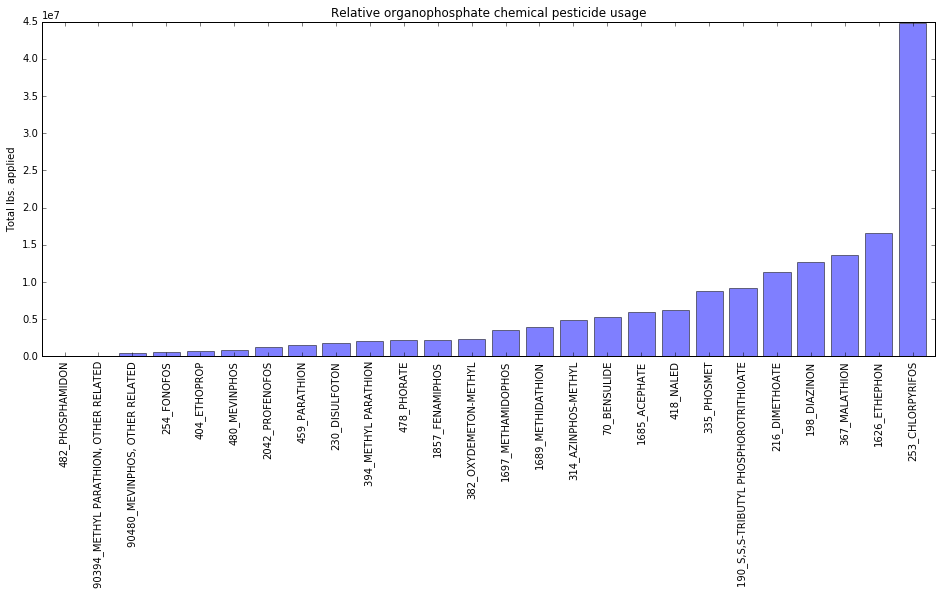

In [24]:
#Organophosphate ACRES 
import math
import matplotlib.pyplot as P
import numpy as np
import sys
%matplotlib inline

P.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')


D={}
for line in open("chem_key2.txt"):
    i=line.strip().split(';')
    if len(i)==2:
        D[i[0]]=i[1]

C = {}
for line in open("OP_yr_mo.data"):
    i=line.strip().split(";")
    #print i
    yr=int(i[0])
    if yr<1990:
        continue
    chem = i[2]
    if chem not in C:
        C[chem]=0
    total_acres=float(i[6])
    total_lbs=float(i[10])
    C[chem]+=total_lbs


code = [X.strip().split()[0] for X in open("sorted_op_lbs.txt")]
#print code

xt =[]
applied = []
for insecticide in code:
    #Set threshold for plot
    if int(C[insecticide])<50000:
        continue
    # convert chem_code to name
    if insecticide in D:
        #print(insecticide,D[insecticide], C[insecticide])
        xt.append("_".join([insecticide,D[insecticide]]))
        applied.append(int(C[insecticide]))
    else:
        #continue
        #print(insecticide,"Not_in_key", C[insecticide])
        xt.append("_".join([insecticide,"Not_in_key"]))
        applied.append(int(C[insecticide]))

y_pos = np.arange(len(xt))

P.bar(y_pos, applied, align='center', alpha=0.5)
P.xticks(y_pos, xt, rotation=90)
P.ylabel('Total lbs. applied')
P.title('Relative organophosphate chemical pesticide usage')
 
P.margins(x=.01)


P.show()

In [ ]:
# PLot a given chemical as a percent of total pyr or OP used over time.

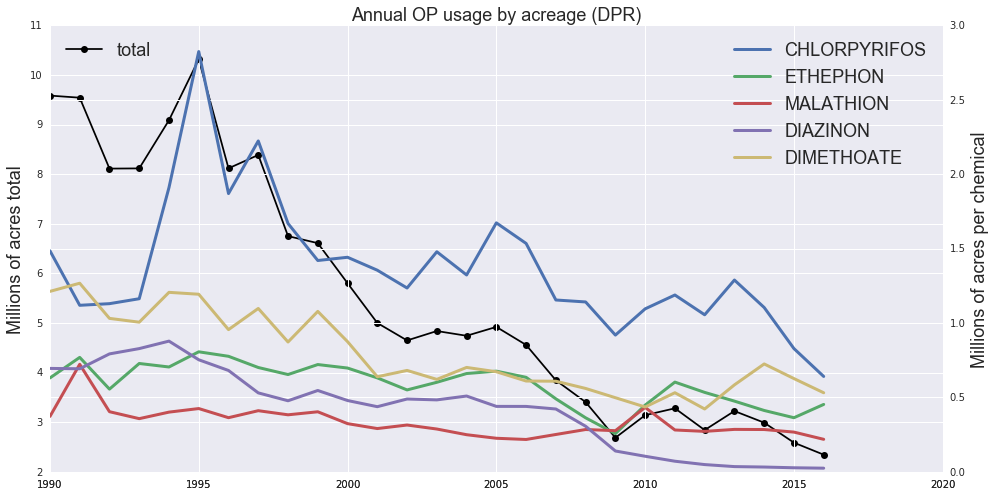

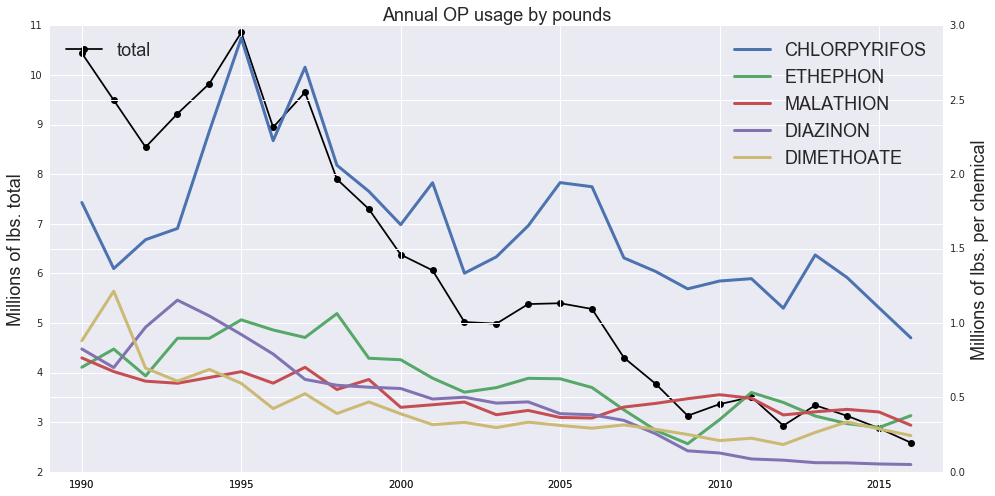

In [143]:
#Organophosphates 
import math
import matplotlib.pyplot as P
import numpy as np
import sys
import pandas as pd
import seaborn as sns
%matplotlib inline

#create figures
fig1 = P.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
fig2 = P.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')


# chemical code dictionary
code_D={}
for line in open("chem_key2.txt"):
    i=line.strip().split(';')
    if len(i)==2:
        code_D[i[0]]=i[1]
        
#Here is a list of the top 10 OPs
#keep = [253,1626,367,198,216,190,335,418,1685,70]
#Here is a list of the top 5 OPs
keep = [253,1626,367,198,216]

df = pd.read_table("OP_yr_mo.data",delimiter=";")
df.columns = ['yr', 'mo', 'chem','unit',"application#","amounts","total_acres","unit_lbs","applic_#",'amounts2','total_lbs']
#chlorpyr=df.loc[df['chem']==253].groupby('yr').sum()


total = df.groupby('yr').sum()
total = total.reset_index()
total = total.loc[total['yr']>=1990]
xlist = total['yr'].tolist()
acre_list = total['total_acres'].tolist()
lbs_list = total['total_lbs'].tolist()
#change units to /Million
acre_list = [x/1000000 for x in acre_list]
lbs_list = [x/1000000 for x in lbs_list]

# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(xlist,acre_list, 'ko-',label='total')


# and the first axes using subplot populated with data 
ax3 = fig2.add_subplot(111)
line2 = ax3.plot(xlist,lbs_list, 'ko-',label='total')
P.ylabel("lbs total",fontsize=18)

# now, the second axes that shares the x-axis with the ax1
ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
ax4 = fig2.add_subplot(111, sharex=ax3, frameon=False)


for chem in keep:
    chlorpyr=df.loc[df['chem']==chem].groupby('yr').sum()
    chlorpyr['fresh_ID']=chem
    chlorpyr = chlorpyr.reset_index()
    chlorpyr = chlorpyr.loc[chlorpyr['yr']>=1990]
    xlist = chlorpyr['yr'].tolist()
    lbs_list = chlorpyr['total_lbs'].tolist()
    acre_list = chlorpyr['total_acres'].tolist()
    #change units to /Million
    acre_list = [x/1000000 for x in acre_list]
    lbs_list = [x/1000000 for x in lbs_list]

    ax2.plot(xlist,acre_list,label=code_D[str(chem)],lw=3)
    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position("right")

    ax4.plot(xlist,lbs_list,label=code_D[str(chem)],lw=3)
    ax4.yaxis.tick_right()
    ax4.yaxis.set_label_position("right")
    
# set labels
ax1.set_title("Annual OP usage by acreage (DPR)",fontsize=18)
ax3.set_title("Annual OP usage by pounds",fontsize=18)
ax1.set_ylabel("Millions of acres total",fontsize=18)
ax2.set_ylabel("Millions of acres per chemical",fontsize=18)
ax3.set_ylabel("Millions of lbs. total",fontsize=18)
ax4.set_ylabel("Millions of lbs. per chemical",fontsize=18)

P.xlim(1989,2017)
ax1.legend(loc=2,fontsize=18)
ax2.legend(loc=1,fontsize=18)
ax3.legend(loc=2,fontsize=18)
ax4.legend(loc=1,fontsize=18)
P.show()

## Chlorpyrifos = a product of Dow Agrosciences
## registered for use in the US since 1965


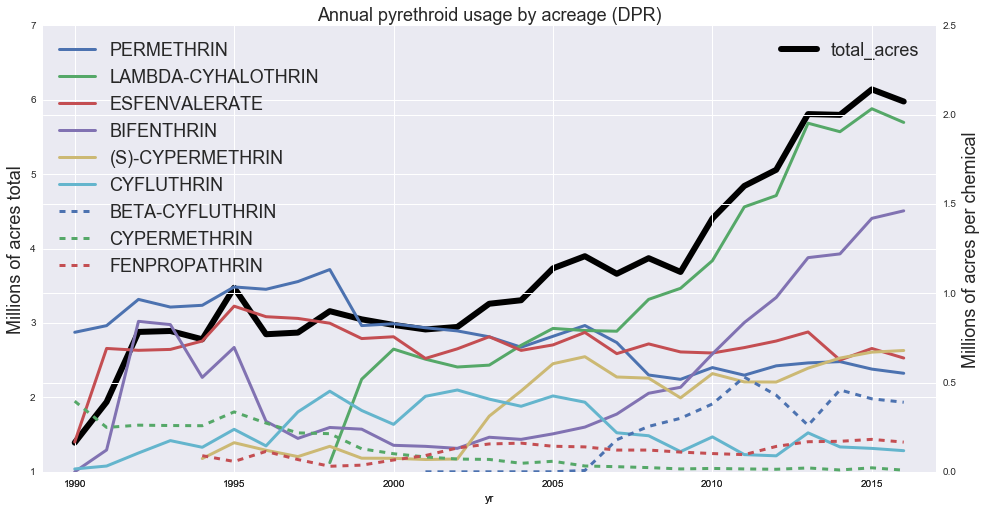

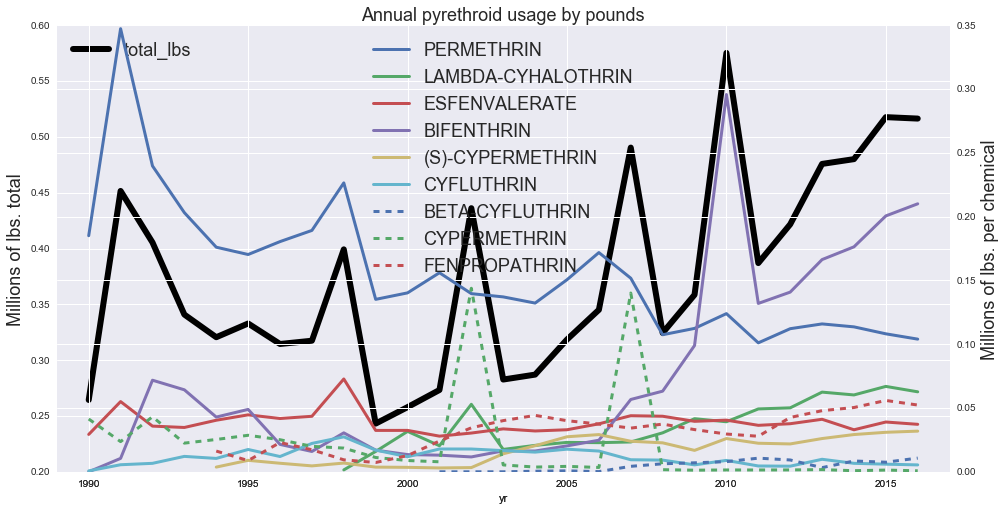

In [82]:
#Pyrethroids 
import math
import matplotlib.pyplot as P
import numpy as np
import sys
import pandas as pd
import seaborn as sns
%matplotlib inline

#create figures
fig1 = P.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
fig2 = P.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')


# chemical code dictionary
code_D={}
for line in open("chem_key2.txt"):
    i=line.strip().split(';')
    if len(i)==2:
        code_D[i[0]]=i[1]
        



pyr_df = pd.read_table("pyr_yr_mo.data",delimiter=";")
pyr_df.columns = ['yr', 'mo', 'chem','unit',"application#","amounts","total_acres","unit_lbs","applic_#",'amounts2','total_lbs']
#chlorpyr=df.loc[df['chem']==253].groupby('yr').sum()


total = pyr_df.groupby('yr').sum()
total = total.reset_index()
total = total.loc[total['yr']>=1990]
#change units to /Million
total['acre_M'] = total['total_acres']/1000000
total['lbs_M'] = total['total_lbs']/1000000

# subplot 1 populated with acreage data 
ax1 = fig1.add_subplot(111)
total.plot(kind='line',x='yr',y='acre_M', color='k', ax=ax1,lw=6, label="total_acres")

# subplot 2 populated with lb data 
ax3 = fig2.add_subplot(111)
total.plot(kind='line',x='yr',y='lbs_M', color='k', ax=ax3,lw=6, label="total_lbs")

#P.ylabel("lbs total",fontsize=18)

# now, the second axes that shares the x-axis with the ax1
ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
ax4 = fig2.add_subplot(111, sharex=ax3, frameon=False)

#Here is a list of the top 9 pyr
keep = [2008,2297,2321,2300,3866,2223,3956,2171,2234]

count=0
for chem in keep:
    count+=1
    pyr=pyr_df.loc[pyr_df['chem']==chem].groupby('yr').sum()
    #chlorpyr['fresh_ID']=chem
    pyr = pyr.reset_index()
    pyr = pyr.loc[pyr['yr']>=1990]
    pyr['acre_M'] = pyr['total_acres']/1000000
    pyr['lbs_M'] = pyr['total_lbs']/1000000
    #print(pyr)
    #break
    #xlist = chlorpyr['yr'].tolist()
    #acre_list = chlorpyr['total_acres'].tolist()
    #lbs_list = chlorpyr['total_lbs'].tolist()

    #change units to /Million
    #acre_list = [x/1000000 for x in acre_list]
    #lbs_list = [x/1000000 for x in lbs_list]

    if count>6:
        pyr.plot(kind='line',x='yr',y='acre_M', ax=ax2,lw=3, linestyle='--',label=code_D[str(chem)])
        pyr.plot(kind='line',x='yr',y='lbs_M', ax=ax4,lw=3, linestyle='--',label=code_D[str(chem)])

        #ax2.plot(xlist,acre_list,label=code_D[str(chem)],lw=3,linestyle='--')
        #ax4.plot(xlist,acre_list,label=code_D[str(chem)],lw=3,linestyle='--')
    else:
        pyr.plot(kind='line',x='yr',y='acre_M', ax=ax2,lw=3, linestyle='-',label=code_D[str(chem)])
        pyr.plot(kind='line',x='yr',y='lbs_M', ax=ax4,lw=3, linestyle='-',label=code_D[str(chem)])
        #ax2.plot(xlist,acre_list,label=code_D[str(chem)],lw=3)
        #ax4.plot(xlist,acre_list,label=code_D[str(chem)],lw=3)
        
    #ax2.plot(xlist,acre_list,label=code_D[str(chem)],lw=3)
    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position("right")

    #ax4.plot(xlist,lbs_list,label=code_D[str(chem)],lw=3)
    ax4.yaxis.tick_right()
    ax4.yaxis.set_label_position("right")
    
# set labels
ax1.set_title("Annual pyrethroid usage by acreage (DPR)",fontsize=18)
ax3.set_title("Annual pyrethroid usage by pounds",fontsize=18)
ax1.set_ylabel("Millions of acres total",fontsize=18)
ax2.set_ylabel("Millions of acres per chemical",fontsize=18)
ax3.set_ylabel("Millions of lbs. total",fontsize=18)
ax4.set_ylabel("Millions of lbs. per chemical",fontsize=18)

ax1.set_xlim(1989,2017)
ax3.set_xlim(1989,2017)
ax1.legend(loc=1,fontsize=18)
ax2.legend(loc=2,fontsize=18)
ax3.legend(loc=2,fontsize=18)
ax4.legend(loc=9,fontsize=18)
P.show()

# a mixture of isomers of cyhalothrin
# Syngenta held the patent for lambda-cyhalothrin which expired in most major markets in 2003.
# moderate toxicity at LD50 79mb/kg (below 50 is highly toxic)

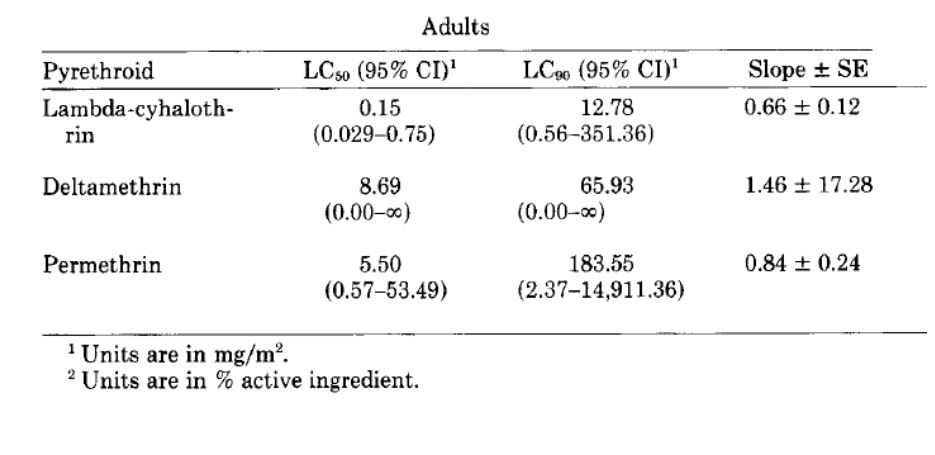

In [153]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("cyhalothrin.png")
P.figure(num=None, figsize=(16, 8), dpi=80)
P.axis('off')

plt.imshow(image)
plt.show()

#Sulaiman et al. 1991 (from Malaysia)

In [ ]:
# CARBAMATES

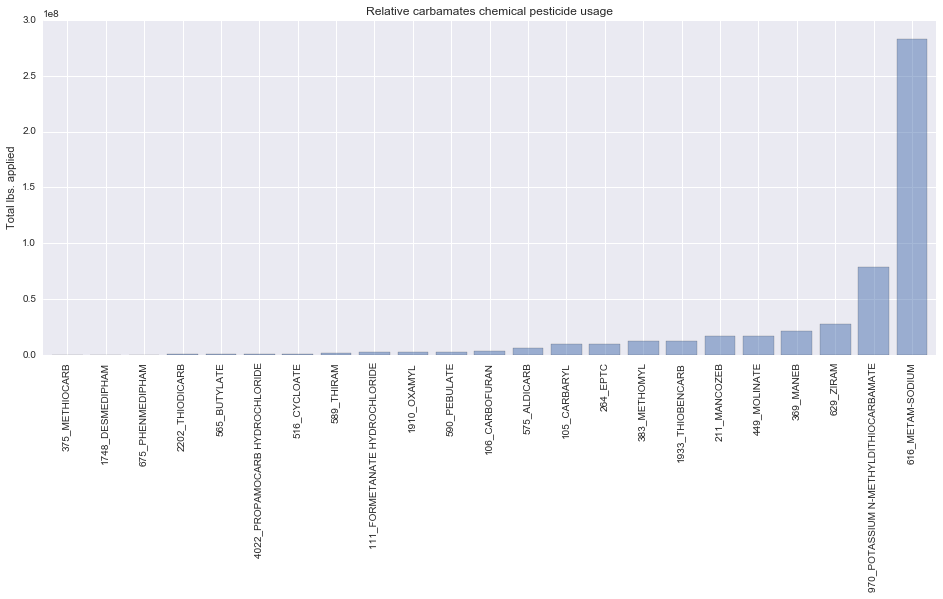

In [53]:
#Carbamate barplot
import math
import matplotlib.pyplot as P
import numpy as np
import sys
%matplotlib inline

P.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')

# chem name dict
D={}
for line in open("chem_key2.txt"):
    i=line.strip().split(';')
    if len(i)==2:
        D[i[0]]=i[1]


C = {}
for line in open("carb_yr_mo.data"):
    i=line.strip().split(";")
    #print i
    yr=int(i[0])
    if yr<1990:
        continue
    chem = i[2]
    if chem not in C:
        C[chem]=0
    total_acres=float(i[6])
    total_lbs=float(i[10])
    C[chem]+=total_lbs

carb_df = pd.read_table("carb_yr_mo.data",delimiter=";")
carb_df.columns = ['yr', 'mo', 'chem','unit',"application#","amounts","total_acres","unit_lbs","applic_#",'amounts2','total_lbs']
#chlorpyr=df.loc[df['chem']==chem].groupby('yr').sum()
#print(carb_df.shape)
carb_df = carb_df.loc[carb_df['yr']>1989]
#print(carb_df.shape)

carb_df = carb_df.groupby('chem').sum()
#print(carb_df.shape)

carb_sorted_df = carb_df.sort_values(by=['total_lbs'])
carb_sorted_df = carb_sorted_df.reset_index()
#code = [X.strip().split()[0] for X in open("sorted_op_lbs.txt")]
code = carb_sorted_df['chem'].tolist()
#print(code)

xt =[]
applied = []
for insecticide in code:
    #for insecticide in C:
    #Set threshold for plot
    insecticide=str(insecticide)
    if int(C[insecticide])<50000:
        continue
    # convert chem_code to name
    if insecticide in D:
        #print(insecticide,D[insecticide], C[insecticide])
        xt.append("_".join([insecticide,D[insecticide]]))
        applied.append(int(C[insecticide]))
    else:
        #continue
        #print(insecticide,"Not_in_key", C[insecticide])
        xt.append("_".join([insecticide,"Not_in_key"]))
        applied.append(int(C[insecticide]))

y_pos = np.arange(len(xt))

P.bar(y_pos, applied, align='center', alpha=0.5)
P.xticks(y_pos, xt, rotation=90)
P.ylabel('Total lbs. applied')
P.title('Relative carbamates chemical pesticide usage')
 
P.margins(x=.01)


P.show()

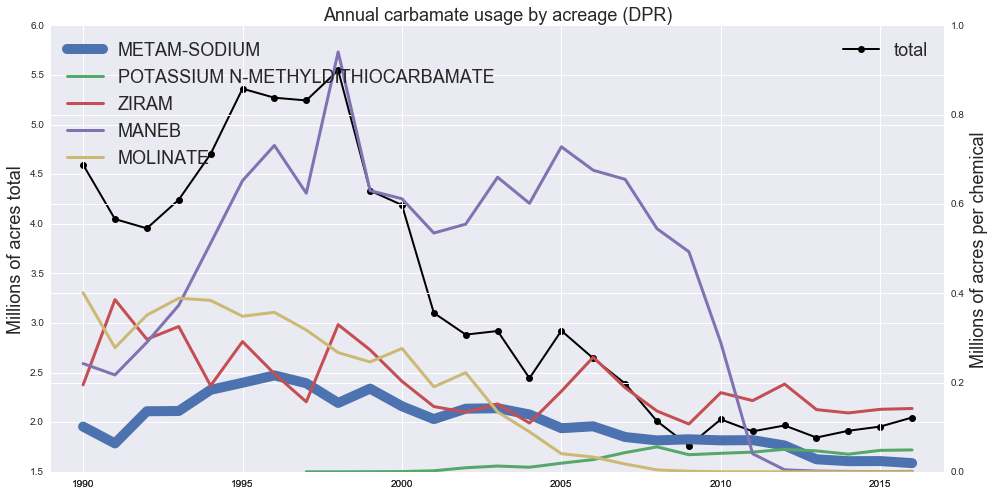

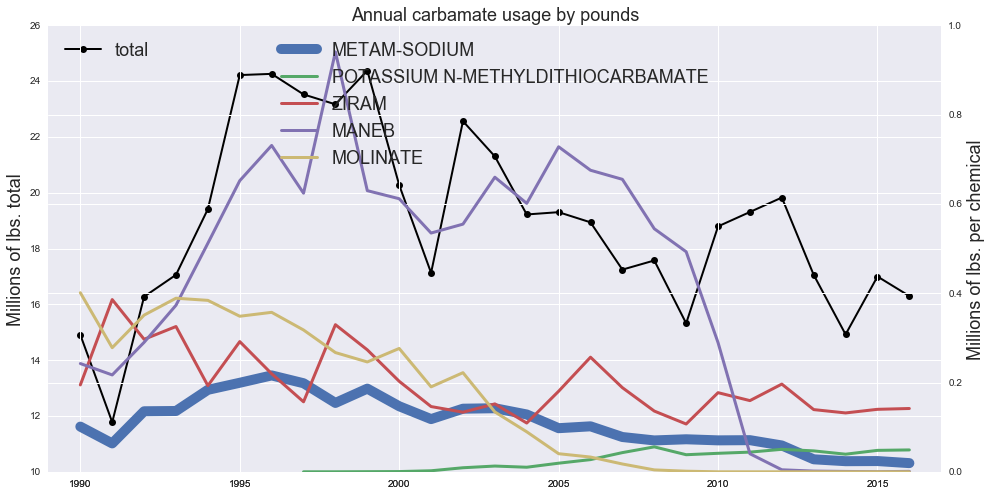

In [64]:
#Carbamate 
import math
import matplotlib.pyplot as P
import numpy as np
import sys
import pandas as pd
import seaborn as sns
%matplotlib inline

#create figures
fig1 = P.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
fig2 = P.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')


# chemical code dictionary
code_D={}
for line in open("chem_key2.txt"):
    i=line.strip().split(';')
    if len(i)==2:
        code_D[i[0]]=i[1]
        
#Here is a list of the top 10 OPs
#keep = [253,1626,367,198,216,190,335,418,1685,70]
#Here is a list of the top 5 OPs
#keep = [253,1626,367,198,216]
#Here is a list of the top 9 pyr
#keep = [2008,2297,2321,2300,3866,2223,3956,2171,2234]



carbamate_df = pd.read_table("carb_yr_mo.data",delimiter=";")
carbamate_df.columns = ['yr', 'mo', 'chem','unit',"application#","amounts","total_acres","unit_lbs","applic_#",'amounts2','total_lbs']
#chlorpyr=df.loc[df['chem']==253].groupby('yr').sum()

#carb_df = carbamate_df.groupby('chem').sum()
#carb_sorted_df = carb_df.sort_values(by=['total_lbs'])
#carb_sorted_df = carb_sorted_df.reset_index()
#print(carb_sorted_df)

# plot total annual usage
annual = carbamate_df.groupby('yr').sum()
annual = annual.reset_index()
annual = annual.loc[annual['yr']>=1990]
xlist = annual['yr'].tolist()
acre_list = annual['total_acres'].tolist()
lbs_list = annual['total_lbs'].tolist()
#change units to /Million
acre_list = [x/1000000 for x in acre_list]
lbs_list = [x/1000000 for x in lbs_list]

# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(xlist,acre_list, 'ko-',label='total',lw=2)


# and the first axes using subplot populated with data 
ax3 = fig2.add_subplot(111)
line2 = ax3.plot(xlist,lbs_list, 'ko-',label='total',lw=2)
P.ylabel("lbs total",fontsize=18)

# now, the second axes that shares the x-axis with the ax1
ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
ax4 = fig2.add_subplot(111, sharex=ax3, frameon=False)

count=0
#for chem in keep:
keep = [616, 970, 629, 369, 449] #, 211, 1933, 383, 264, 105, 575, 106, 590, 1910, 111, 589, 516, 4022, 565, 2202, 675, 1748, 375, 49, 548, 1987, 1924, 417, 141, 55, 627, 339, 2283, 62, 2147, 115, 623, 288, 1875, 1746, 691, 1934, 493, 1938, 2201]
#for chem in code:
for chemical in keep:
    count+=1
    if count>10:
        break
    #print(carbamate_df)
    # remove years prior to 1990
    carbamate_df = carbamate_df.loc[carbamate_df['yr']>=1990]
    carbamate_chem=carbamate_df.loc[carbamate_df['chem']==chemical].groupby('yr').sum()
    carbamate_chem = carbamate_chem.reset_index()
    #carbamate_chem['fresh_ID']=chemical
    #print(carbamate_chem)

    xlist = carbamate_chem['yr'].tolist()
    acre_list = carbamate_chem['total_acres'].tolist()
    lbs_list = carbamate_chem['total_lbs'].tolist()

    #change units to /Million
    acre_list = [x/1000000 for x in acre_list]
    lbs_list = [x/1000000 for x in lbs_list]

    if count>6:
        ax2.plot(xlist,acre_list,label=code_D[str(chemical)],lw=3,linestyle='--')
        ax4.plot(xlist,acre_list,label=code_D[str(chemical)],lw=3,linestyle='--')
    else:
        if chemical==616:
            ax2.plot(xlist,acre_list,label=code_D[str(chemical)],lw=10)
            ax4.plot(xlist,acre_list,label=code_D[str(chemical)],lw=10)
        else:
            ax2.plot(xlist,acre_list,label=code_D[str(chemical)],lw=3)
            ax4.plot(xlist,acre_list,label=code_D[str(chemical)],lw=3)
        
    #ax2.plot(xlist,acre_list,label=code_D[str(chem)],lw=3)
    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position("right")

    #ax4.plot(xlist,lbs_list,label=code_D[str(chem)],lw=3)
    ax4.yaxis.tick_right()
    ax4.yaxis.set_label_position("right")
    
# set labels
ax1.set_title("Annual carbamate usage by acreage (DPR)",fontsize=18)
ax3.set_title("Annual carbamate usage by pounds",fontsize=18)
ax1.set_ylabel("Millions of acres total",fontsize=18)
ax2.set_ylabel("Millions of acres per chemical",fontsize=18)
ax3.set_ylabel("Millions of lbs. total",fontsize=18)
ax4.set_ylabel("Millions of lbs. per chemical",fontsize=18)

ax1.set_xlim(1989,2017)
ax3.set_xlim(1989,2017)
ax1.legend(loc=1,fontsize=18)
ax2.legend(loc=2,fontsize=18)
ax3.legend(loc=2,fontsize=18)
ax4.legend(loc=9,fontsize=18)
P.show()

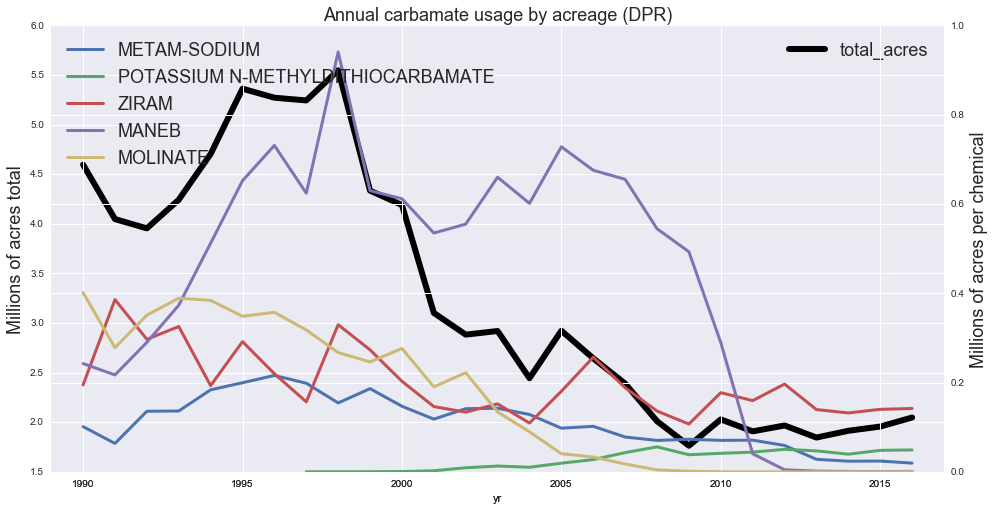

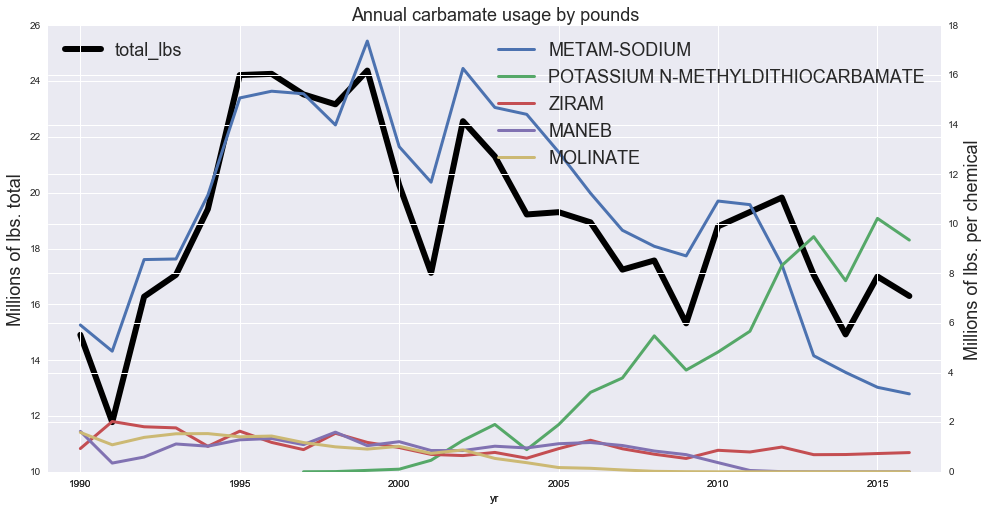

In [85]:
#Pyrethroids 
import math
import matplotlib.pyplot as P
import numpy as np
import sys
import pandas as pd
import seaborn as sns
%matplotlib inline

#create figures
fig1 = P.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
fig2 = P.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')


# chemical code dictionary
code_D={}
for line in open("chem_key2.txt"):
    i=line.strip().split(';')
    if len(i)==2:
        code_D[i[0]]=i[1]
        



pyr_df = pd.read_table("carb_yr_mo.data",delimiter=";")
pyr_df.columns = ['yr', 'mo', 'chem','unit',"application#","amounts","total_acres","unit_lbs","applic_#",'amounts2','total_lbs']
#chlorpyr=df.loc[df['chem']==253].groupby('yr').sum()


total = pyr_df.groupby('yr').sum()
total = total.reset_index()
total = total.loc[total['yr']>=1990]
#change units to /Million
total['acre_M'] = total['total_acres']/1000000
total['lbs_M'] = total['total_lbs']/1000000

# subplot 1 populated with acreage data 
ax1 = fig1.add_subplot(111)
total.plot(kind='line',x='yr',y='acre_M', color='k', ax=ax1,lw=6, label="total_acres")

# subplot 2 populated with lb data 
ax3 = fig2.add_subplot(111)
total.plot(kind='line',x='yr',y='lbs_M', color='k', ax=ax3,lw=6, label="total_lbs")

#P.ylabel("lbs total",fontsize=18)

# now, the second axes that shares the x-axis with the ax1
ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
ax4 = fig2.add_subplot(111, sharex=ax3, frameon=False)

#Here is a list of the top 9 pyr
#keep = [2008,2297,2321,2300,3866,2223,3956,2171,2234]
keep = [616, 970, 629, 369, 449] #, 211, 1933, 383, 264, 105, 575, 106, 590, 1910, 111, 589, 516, 4022, 565, 2202, 675, 1748, 375, 49, 548, 1987, 1924, 417, 141, 55, 627, 339, 2283, 62, 2147, 115, 623, 288, 1875, 1746, 691, 1934, 493, 1938, 2201]

count=0
#for chem in keep:
for chem in keep:
    count+=1
    pyr=pyr_df.loc[pyr_df['chem']==chem].groupby('yr').sum()
    #chlorpyr['fresh_ID']=chem
    pyr = pyr.reset_index()
    pyr = pyr.loc[pyr['yr']>=1990]
    pyr['acre_M'] = pyr['total_acres']/1000000
    pyr['lbs_M'] = pyr['total_lbs']/1000000
    #print(pyr)
    #break
    #xlist = chlorpyr['yr'].tolist()
    #acre_list = chlorpyr['total_acres'].tolist()
    #lbs_list = chlorpyr['total_lbs'].tolist()

    #change units to /Million
    #acre_list = [x/1000000 for x in acre_list]
    #lbs_list = [x/1000000 for x in lbs_list]

    if count>6:
        pyr.plot(kind='line',x='yr',y='acre_M', ax=ax2,lw=3, linestyle='--',label=code_D[str(chem)])
        pyr.plot(kind='line',x='yr',y='lbs_M', ax=ax4,lw=3, linestyle='--',label=code_D[str(chem)])

        #ax2.plot(xlist,acre_list,label=code_D[str(chem)],lw=3,linestyle='--')
        #ax4.plot(xlist,acre_list,label=code_D[str(chem)],lw=3,linestyle='--')
    else:
        pyr.plot(kind='line',x='yr',y='acre_M', ax=ax2,lw=3, linestyle='-',label=code_D[str(chem)])
        pyr.plot(kind='line',x='yr',y='lbs_M', ax=ax4,lw=3, linestyle='-',label=code_D[str(chem)])
        #ax2.plot(xlist,acre_list,label=code_D[str(chem)],lw=3)
        #ax4.plot(xlist,acre_list,label=code_D[str(chem)],lw=3)
        
    #ax2.plot(xlist,acre_list,label=code_D[str(chem)],lw=3)
    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position("right")

    #ax4.plot(xlist,lbs_list,label=code_D[str(chem)],lw=3)
    ax4.yaxis.tick_right()
    ax4.yaxis.set_label_position("right")
    
# set labels
ax1.set_title("Annual carbamate usage by acreage (DPR)",fontsize=18)
ax3.set_title("Annual carbamate usage by pounds",fontsize=18)
ax1.set_ylabel("Millions of acres total",fontsize=18)
ax2.set_ylabel("Millions of acres per chemical",fontsize=18)
ax3.set_ylabel("Millions of lbs. total",fontsize=18)
ax4.set_ylabel("Millions of lbs. per chemical",fontsize=18)

ax1.set_xlim(1989,2017)
ax3.set_xlim(1989,2017)
ax1.legend(loc=1,fontsize=18)
ax2.legend(loc=2,fontsize=18)
ax3.legend(loc=2,fontsize=18)
ax4.legend(loc=1,fontsize=18)
P.show()